# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depend on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)  # training data
x_valid = np.random.uniform(-1, 1, 10)   # validation data
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

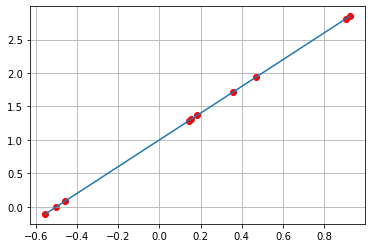

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 0s 40ms/step - loss: 2.4553 - mse: 2.4553 - val_loss: 2.9414 - val_mse: 2.9414
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 2.2465 - mse: 2.2465 - val_loss: 2.6875 - val_mse: 2.6875
Epoch 3/30
4/4 [==============================] - 0s 7ms/step - loss: 2.0760 - mse: 2.0760 - val_loss: 2.5121 - val_mse: 2.5121
Epoch 4/30
4/4 [==============================] - 0s 12ms/step - loss: 1.9506 - mse: 1.9506 - val_loss: 2.3279 - val_mse: 2.3279
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 1.8228 - mse: 1.8228 - val_loss: 2.1127 - val_mse: 2.1127
Epoch 6/30
4/4 [==============================] - 0s 8ms/step - loss: 1.6764 - mse: 1.6764 - val_loss: 1.9566 - val_mse: 1.9566
Epoch 7/30
4/4 [==============================] - 0s 15ms/step - loss: 1.5658 - mse: 1.5658 - val_loss: 1.8499 - val_mse: 1.8499
Epoch 8/30
4/4 [==============================] - 0s 10ms/step - loss: 1.4805 - mse: 1.4805 - val_lo

In [7]:
# return weights
model.get_weights()

[array([[0.93141836]], dtype=float32), array([0.8390504], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 14ms/step - loss: 0.4095 - mse: 0.4095

Test loss: 0.4094671308994293
Test accuracy: 0.4094671308994293


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 14ms/step - loss: 0.4095 - mse: 0.4095

Test loss: 0.4094671308994293
Test accuracy: 0.4094671308994293


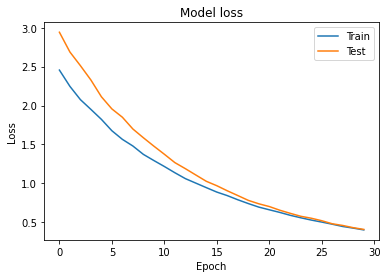

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

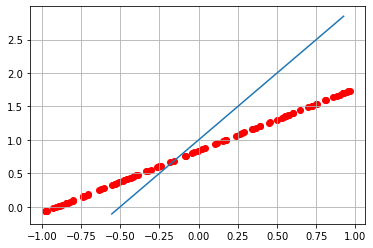

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### <span style="color:fuchsia"> Model 1: $\sigma = 0.0, N_{train} = 500, N_{epochs}=30$ </span>

In [12]:
sigma = 0.0
n_train = 500
n_valid = int(n_train/10)
n_epochs = 30

In [13]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)  # training data
x_valid = np.random.uniform(-1, 1, n_valid)   # validation data
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = sigma # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

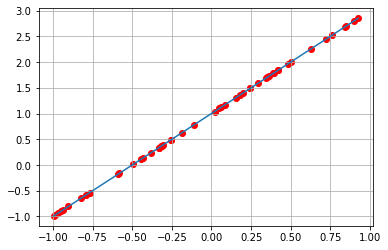

In [59]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [14]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [15]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 1.9508 - mse: 1.9508 - val_loss: 1.4042 - val_mse: 1.4042
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 1.3652 - mse: 1.3652 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 0.7490 - val_mse: 0.7490
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7436 - mse: 0.7436 - val_loss: 0.5692 - val_mse: 0.5692
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5670 - mse: 0.5670 - val_loss: 0.4418 - val_mse: 0.4418
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4402 - mse: 0.4402 - val_loss: 0.3484 - val_mse: 0.3484
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3464 - mse: 0.3464 - val_loss: 0.2759 - val_mse: 0.2759
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2736 - mse: 0.27

In [17]:
# return weights
model.get_weights()

[array([[1.9248691]], dtype=float32), array([0.9989645], dtype=float32)]

In [18]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018

Test loss: 0.0017935356590896845
Test accuracy: 0.0017935356590896845


In [19]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018

Test loss: 0.0017935356590896845
Test accuracy: 0.0017935356590896845


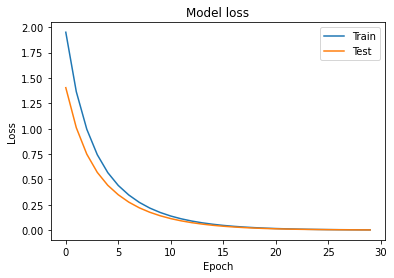

In [20]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

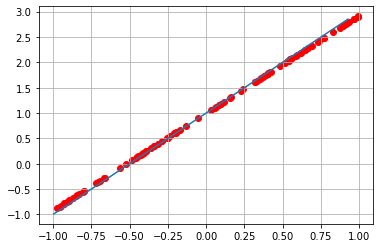

In [21]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

<span style="color:purple"> 
    
Here I built a NN with a larger training dataset, $N_{train} = 500$.
    
This NN was made too see that enlarging the training dataset allows the network to perform better than in the example above. Indeed the prediction is accurate and the final loss is 0.002, while in the example was 0.041 with a poor prediction.

### <span style="color:fuchsia"> Model 2: $\sigma = 1, N_{train} = 600, N_{epochs}=30$ </span>

In [35]:
sigma = 1.
n_train = 500
n_valid = int(n_train/10)
n_epochs = 30

In [36]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)  # training data
x_valid = np.random.uniform(-1, 1, n_valid)   # validation data
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = sigma # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

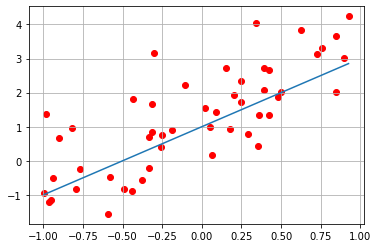

In [37]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [38]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [39]:
# get a summary of our composed model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 5.1784 - mse: 5.1784 - val_loss: 4.7122 - val_mse: 4.7122
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 4.2065 - mse: 4.2065 - val_loss: 3.8500 - val_mse: 3.8500
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 3.4878 - mse: 3.4878 - val_loss: 3.2204 - val_mse: 3.2204
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 2.9543 - mse: 2.9543 - val_loss: 2.7487 - val_mse: 2.7487
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 2.5430 - mse: 2.5430 - val_loss: 2.3903 - val_mse: 2.3903
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 2.2253 - mse: 2.2253 - val_loss: 2.1073 - val_mse: 2.1073
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 1.9747 - mse: 1.9747 - val_loss: 1.8877 - val_mse: 1.8877
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 1.7776 - mse: 1.77

In [41]:
# return weights
model.get_weights()

[array([[1.9760625]], dtype=float32), array([0.89005053], dtype=float32)]

In [42]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 1.1125 - mse: 1.1125

Test loss: 1.1124718189239502
Test accuracy: 1.1124718189239502


In [43]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0120 - mse: 0.0120

Test loss: 0.011996112763881683
Test accuracy: 0.011996112763881683


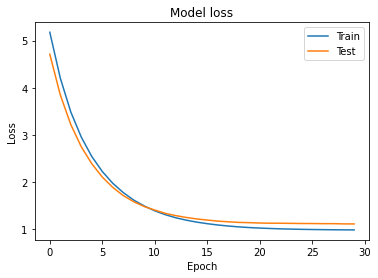

In [44]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

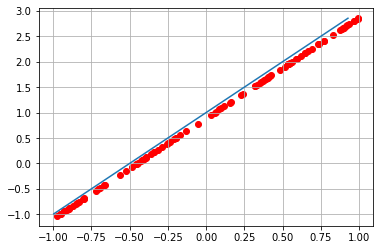

In [45]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

<span style="color:purple"> 

Here I built a NN that works on very noisy data, $\sigma = 1$.
    
Here, like in the NN model1, enlarging the dataset was necessary to allow a decent fit. We can see that the fit is still acceptable, but poorer than with model1, reaching a final loss of 0.012 instead of 0.002 of before. By adding so much noise, we lost almost an order of magnitude in accuracy, and that is what I expected.

### <span style="color:fuchsia"> Model 3: $\sigma = 0.1, N_{train} = 500, N_{epochs}=10$ </span>

In [68]:
sigma = 0.1
n_train = 500
n_valid = int(n_train/10)
n_epochs = 20

In [69]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)  # training data
x_valid = np.random.uniform(-1, 1, n_valid)   # validation data
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = sigma # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

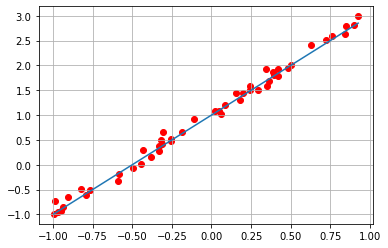

In [70]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [71]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [72]:
# get a summary of our composed model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [73]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
16/16 [==============================] - 0s 8ms/step - loss: 4.2869 - mse: 4.2869 - val_loss: 3.3158 - val_mse: 3.3158
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 3.2566 - mse: 3.2566 - val_loss: 2.5581 - val_mse: 2.5581
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 2.5209 - mse: 2.5209 - val_loss: 2.0004 - val_mse: 2.0004
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 1.9732 - mse: 1.9732 - val_loss: 1.5801 - val_mse: 1.5801
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 1.5593 - mse: 1.5593 - val_loss: 1.2590 - val_mse: 1.2590
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 1.2418 - mse: 1.2418 - val_loss: 1.0060 - val_mse: 1.0060
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.9922 - mse: 0.9922 - val_loss: 0.8081 - val_mse: 0.8081
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 0.7965 - mse: 0.79

In [74]:
# return weights
model.get_weights()

[array([[1.6258562]], dtype=float32), array([0.9838787], dtype=float32)]

In [75]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 1ms/step - loss: 0.0555 - mse: 0.0555

Test loss: 0.05549388751387596
Test accuracy: 0.05549388751387596


In [76]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0443 - mse: 0.0443

Test loss: 0.044282253831624985
Test accuracy: 0.044282253831624985


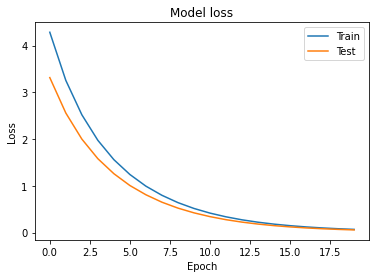

In [77]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

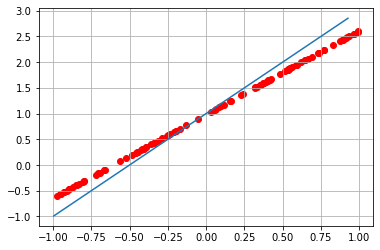

In [78]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

<span style="color:purple"> 

Here I built a NN that works with less epochs, $N_{epochs} = 20$, on noisy data $\sigma = 0.1$.
    
Here, like in the NN model1, enlarging the dataset was necessary to allow a decent fit. 
We can see that the fit is quite poor, reaching a final loss of 0.055, the highest among my 3 models.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [88]:
# target parameters of f(x) = a*x*x*x + b*x*x + c*x + d
a = 3
b = -2
c = -3
d = 4

In [89]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)  # training data
x_valid = np.random.uniform(-1, 1, 100)   # validation data
x_valid.sort()
y_target = a*x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d # ideal (target) linear function

sigma = 0.2
y_train = np.random.normal(a*x_train*x_train*x_train + b*x_train*x_train + c*x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d, sigma)

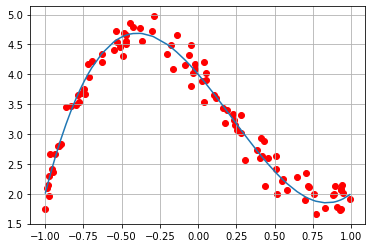

In [90]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [91]:
# model 1
model1 = tf.keras.Sequential()
model1.add(Dense(200, input_shape=(1,), activation='relu'))
model1.add(Dense(20, input_shape=(1,), activation='relu'))
model1.add(Dense(1, input_shape=(1,), activation='relu'))
# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])


# model 2
model2 = tf.keras.Sequential()
model2.add(Dense(200, input_shape=(1,), activation='elu'))
model2.add(Dense(20, input_shape=(1,), activation='elu'))
model2.add(Dense(1, input_shape=(1,), activation='elu'))
# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])


# model 3
model3 = tf.keras.Sequential()
model3.add(Dense(200, input_shape=(1,), activation='elu'))
model3.add(Dense(20, input_shape=(1,), activation='elu'))
model3.add(Dense(2, input_shape=(1,), activation='elu'))
model3.add(Dense(1, input_shape=(1,), activation='elu'))
# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mae', metrics=['mse'])

In [92]:
# fit the model using training dataset
print('\n\nModel 1:\n')
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

print('\n\nModel 2:\n')
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

print('\n\nModel 3:\n')
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))



Model 1:

Epoch 1/30
32/32 [==============================] - 0s 5ms/step - loss: 9.7549 - mse: 9.7549 - val_loss: 5.6591 - val_mse: 5.6591
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 3.5605 - mse: 3.5605 - val_loss: 1.5458 - val_mse: 1.5458
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 1.1483 - mse: 1.1483 - val_loss: 1.2451 - val_mse: 1.2451
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7893 - mse: 0.7893 - val_loss: 0.9579 - val_mse: 0.9579
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6262 - mse: 0.6262 - val_loss: 0.8001 - val_mse: 0.8001
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5187 - mse: 0.5187 - val_loss: 0.6539 - val_mse: 0.6539
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.5693 - val_mse: 0.5693
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3390

In [93]:
# evaluate model
score1 = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print('Model 1')
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

print('Model 2')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

print('Model 3')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.4218 - mse: 0.2672
Model 1
Test loss: 0.045796073973178864
Test accuracy: 0.045796073973178864
Model 2
Test loss: 0.08010765165090561
Test accuracy: 0.08010765165090561
Model 3
Test loss: 0.4217568635940552
Test accuracy: 0.26717057824134827


In [94]:
# evaluate model with the exact curve
score1 = model1.evaluate(x_valid, y_target, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid, y_target, batch_size=32, verbose=1)
score3 = model3.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print('Model 1')
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

print('Model 2')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

print('Model 3')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.4017 - mse: 0.2179
Model 1
Test loss: 0.014148849993944168
Test accuracy: 0.014148849993944168
Model 2
Test loss: 0.050031013786792755
Test accuracy: 0.050031013786792755
Model 3
Test loss: 0.4017280340194702
Test accuracy: 0.2178766280412674


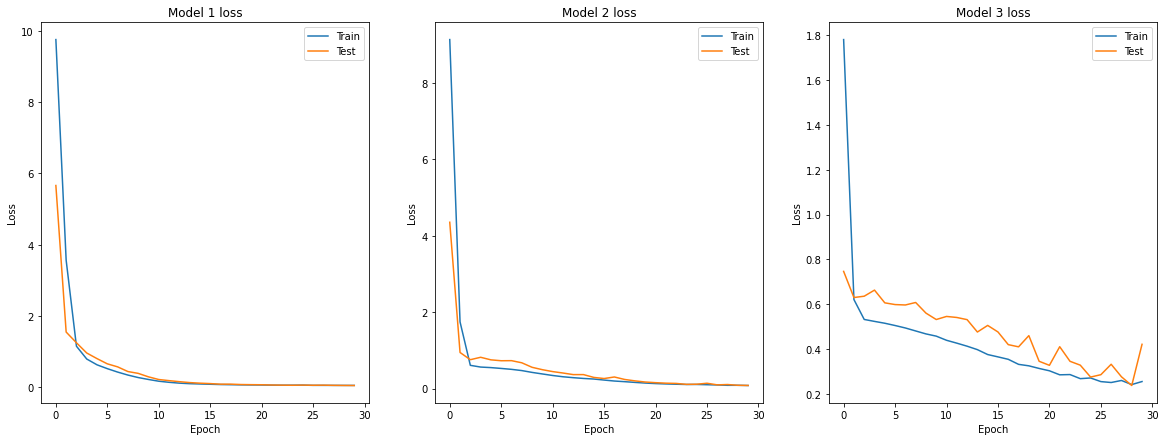

In [95]:
# look into training history
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# look into training history
# Plot training & validation loss values
ax[0].plot(history1.history['loss'])
ax[0].plot(history1.history['val_loss'])
ax[0].set_title('Model 1 loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Model 2 loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')

ax[2].plot(history3.history['loss'])
ax[2].plot(history3.history['val_loss'])
ax[2].set_title('Model 3 loss')
ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epoch')
ax[2].legend(['Train', 'Test'], loc='best')

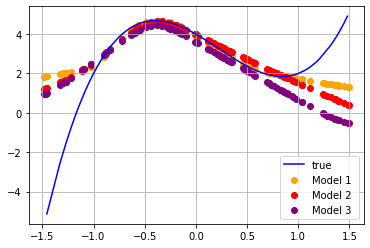

In [96]:
x_valid = np.random.uniform(-1.5, 1.5, 100)
x_valid.sort()
y_target = a*x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d 
plt.plot(x_valid, y_target,color='blue', label='true')

x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted1 = model1.predict(x_predicted)
y_predicted2 = model2.predict(x_predicted)
y_predicted3 = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted1, color='orange', label="Model 1 ")
plt.scatter(x_predicted, y_predicted2, color='red', label="Model 2 ")
plt.scatter(x_predicted, y_predicted3, color='purple', label="Model 3 ")
plt.legend(loc="best")
plt.grid(True)
plt.show()

<span style="color:purple"> 

Here I built 3 NNs that work on 1000 training data with $\sigma = 0.2$, with 30 epochs.
    
NN model1 is made of 3 layers with relu activation and uses Adam optimizer with mse as loss.
 
NN model2 is made of 3 layers with elu activation and uses Adam optimizer with mse as loss.
    
NN model3 is made of 4 layers with elu activation and uses sgd optimizer with mae as loss.
    
From what we see in the plot of the prediction, we can say that the first two NN are quite similar, so using elu or relu does not affect the predictions strongly. Relu activated neurons work better, reaching a loss of 0.01, while elu reaches 0.05. The predictions in the training interval (-1, 1) are fine; outside, they both give inaccurate results, but model1 with relu is able to describe the bending of the curve a bit better.
    
Model3 is very different from the other two: it uses sgd optimizer with mae loss. Here, one more layer was necessary to get a decent result, so the NN has a total of 4 elu activated layers.
The main difference of model3 is that it does not predict good data also in the training interval and performs badly especially around and after x=1. Indeed, the final mae is 0.40.
    
From these 3 models I could say that Adam optimizer seems to work better than sgd and needs a less deep network (3 layers vs. 4 of sgd).

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [293]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, size=(1000, 2))  # training data
x_valid = np.random.uniform(-1.5, 1.5, size=(100, 2))   # validation data
x_valid.sort()
y_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2) # ideal (target) linear function

sigma = 0.2
y_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(y_target, sigma)

Text(0.5, 0.92, 'noisy data')

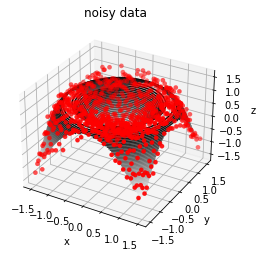

In [299]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

def f(x, y):
    return np.sin(x ** 2 + y ** 2)

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.contour3D(X, Y, Z, 50, cmap='binary')

X, Y, np.meshgrid(x, y)
Z = np.random.normal(f(X, Y), sigma)
ax.scatter(X, Y, Z, color='red', linewidth=0.1);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('noisy data')

In [258]:
# model 1
model1 = tf.keras.Sequential()
model1.add(Dense(200, input_shape=(2,), activation='relu'))
model1.add(Dense(120, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(1, activation='relu'))
# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

In [259]:
# fit the model using training dataset
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 4ms/step - loss: 0.2621 - mse: 0.2621 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2103 - mse: 0.2103 - val_loss: 0.1930 - val_mse: 0.1930
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1868 - mse: 0.1868 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.1693 - mse: 0.1693 - val_loss: 0.1634 - val_mse: 0.1634
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1597 - mse: 0.1597 - val_loss: 0.1442 - val_mse: 0.1442
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1422 - mse: 0.1422 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1138 - val_mse: 0.1138
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.11

In [260]:
# evaluate model
score1 = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print('Model 1')
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.0534 - mse: 0.0534
Model 1
Test loss: 0.05337672308087349
Test accuracy: 0.05337672308087349


In [261]:
# evaluate model with the exact curve
score1 = model1.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print('Model 1')
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.0215 - mse: 0.0215
Model 1
Test loss: 0.02153458632528782
Test accuracy: 0.02153458632528782


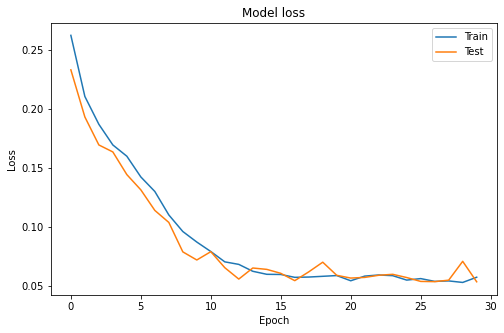

In [264]:
# look into training history
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# look into training history
# Plot training & validation loss values
ax.plot(history1.history['loss'])
ax.plot(history1.history['val_loss'])
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='best')

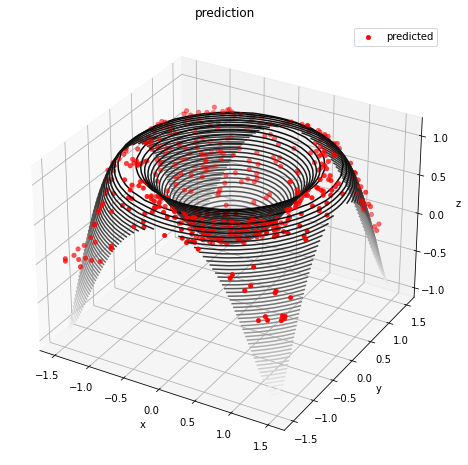

In [300]:
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection='3d')

def f(x, y):
    return np.sin(x ** 2 + y ** 2)

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='binary')

x_predicted = np.random.uniform(-1.5, 1.5, size=(500,2))
y_predicted = model1.predict(x_predicted)

ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color='red', linewidth=0.5, label='predicted')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('prediction')
ax.legend()

<span style="color:purple"> 
    
This NN works on 1000 pairs (x, y) of training, with $\sigma = 0.2$, with 30 epochs.
    
The model has 4 relu activated layers of 200, 120, 30 and 1 neurons respectively and uses Adam optimizer with mse as loss. 
    
The NN predicts quite good, as we can see from the plot 'prediction' above, and it reaches a final loss of 0.05.

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

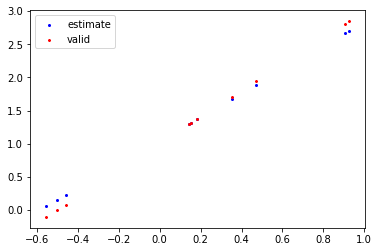

10/10 [==============================] - 0s 21ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0117 - val_mean_squared_error: 0.0117


[array([[1.7890505]], dtype=float32), array([1.0447811], dtype=float32)]

In [15]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()